In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.ExcelFile('./data_sets/Endangered_Languages.xlsx')
endangered_languages = data.parse('Extended_Dataset')
necessary_data = ['Name in English', 'Countries', 'Country codes alpha 3', 'Degree of endangerment',
                  'Number of speakers', 'Latitude', 'Longitude']
endangered_languages = endangered_languages[necessary_data]
endangered_languages.set_index('Name in English', inplace=True)
endangered_languages.shape
endangered_languages.head()

,Countries,Country codes alpha 3,Degree of endangerment,Number of speakers,Latitude,Longitude
Name in English,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019
Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS",Vulnerable,4800000.0,53.4029,10.3601
Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",Vulnerable,4000000.0,53.9560,27.5756
Lombard,"Italy, Switzerland","ITA, CHE",Definitely endangered,3500000.0,45.7215,9.3273


In [3]:
type(endangered_languages.loc['Low Saxon', 'Country codes alpha 3'])

str

In [4]:
result = [x.strip() for x in endangered_languages.loc['Low Saxon', 'Country codes alpha 3'].split(',')][0]

In [5]:
result

'DEU'

In [6]:
fertility_rate_df = pd.read_excel('./data_sets/Fertility-Rate.xls')
needed_data = ['Country Name', 'Country Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
fertility_rate_df = fertility_rate_df[needed_data]
fertility_rate_df.set_index('Country Name', inplace=True)
fertility_rate_df.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
Afghanistan,AFG,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
Angola,AGO,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863
Albania,ALB,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771


In [7]:
fertility_rate_df.columns

Index(['Country Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013'],
      dtype='object')

In [8]:
fertility_rate_df.shape

(215, 55)

In [9]:
endangered_languages.shape

(2722, 6)

In [10]:
endangered_languages['Country codes alpha 3'] = endangered_languages['Country codes alpha 3'].fillna("None")

In [11]:
endangered_languages['Country codes alpha 3'] = [x.split(',')[0] for x in endangered_languages['Country codes alpha 3']]

In [12]:
endangered_languages.head(15)

,Countries,Country codes alpha 3,Degree of endangerment,Number of speakers,Latitude,Longitude
Name in English,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019
Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...",DEU,Vulnerable,4800000.0,53.4029,10.3601
Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...",BRB,Vulnerable,4000000.0,53.9560,27.5756
Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273
Romani,"Albania, Germany, Austria, Belarus, Bosnia and...",ALB,Definitely endangered,3500000.0,46.3165,22.3681
Yiddish (Israel),Israel,ISR,Definitely endangered,3000000.0,32.0833,34.8333
Gondi,India,IND,Vulnerable,2713790.0,19.5804,80.4418
Limburgian-Ripuarian,"Germany, Belgium, Netherlands",DEU,Vulnerable,2600000.0,50.7781,6.0864


In [13]:
fertility_rate_df.loc['Italy']

Country Code     ITA
1960            2.37
1961            2.42
1962            2.44
1963             2.5
1964            2.65
1965            2.59
1966            2.57
1967             2.5
1968            2.49
1969            2.46
1970            2.38
1971             2.4
1972            2.35
1973             2.3
1974            2.28
1975            2.17
1976            2.04
1977            1.93
1978            1.84
1979            1.73
1980            1.64
1981            1.58
1982            1.56
1983            1.51
1984            1.46
1985            1.42
1986            1.35
1987            1.33
1988            1.36
1989            1.33
1990            1.33
1991             1.3
1992             1.3
1993            1.25
1994            1.21
1995            1.19
1996             1.2
1997            1.21
1998            1.21
1999            1.23
2000            1.26
2001            1.25
2002            1.27
2003            1.29
2004            1.34
2005            1.34
2006         

In [14]:
endangered_languages_grouped_by_country = endangered_languages.groupby('Country codes alpha 3')

In [15]:
endangered_languages_grouped_by_country.get_group('ITA')

,Countries,Country codes alpha 3,Degree of endangerment,Number of speakers,Latitude,Longitude
Name in English,,,,,,
South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490
Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019
Lombard,"Italy, Switzerland",ITA,Definitely endangered,3500000.0,45.7215,9.3273
Emilian-Romagnol,"Italy, San Marino",ITA,Definitely endangered,2000000.0,44.1270,12.0739
Piedmontese,Italy,ITA,Definitely endangered,2000000.0,45.2013,7.8662
Campidanese,Italy,ITA,Definitely endangered,900000.0,39.2991,8.9868
Friulian,Italy,ITA,Definitely endangered,600000.0,46.1037,13.1396
Logudorese,Italy,ITA,Definitely endangered,400000.0,40.1116,9.1845
Sassarese,Italy,ITA,Definitely endangered,120000.0,40.6139,8.6132


In [16]:
endangered_languages_grouped_by_country.size()

Country codes alpha 3
AFG     12
ALB      4
ANG      4
ARG     18
ARM      2
AUS    108
AUT      1
AZE     11
BEL      5
BEN      1
BFA      1
BGD      5
BGR      3
BLZ      4
BOL     34
BRA    190
BRB      2
BTN     19
BWA     11
CAF      5
CAN     93
CHE      1
CHL      5
CHN    146
CIV      4
CMR     36
COG      2
COK      4
COL     67
CRI      8
      ... 
RUS    122
SDN     61
SEN     14
SLB     18
SLE      4
SLV      2
SUR      5
SVK      1
SVN      1
SWE      3
SYR      3
TCD     28
THA     14
TJK      8
TKL      1
TLS      6
TUN      3
TUR      7
TUV      1
TZA     11
UGA      6
UKR      8
USA    216
UZB      3
VEN     21
VNM     20
VUT     47
YEM      2
ZAF     10
ZAI      5
Length: 143, dtype: int64

In [17]:
fertility_rate_df.loc['Italy', '1960':].mean()

1.7140740740740743

In [18]:
fertility_rate_df_average = fertility_rate_df.copy()
fertility_rate_df_average['Fertility Rate Avg'] = fertility_rate_df_average.mean(numeric_only=True, axis=1)
fertility_rate_df_average.head(10)

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Fertility Rate Avg
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673,2.481593
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN,1.216000
Afghanistan,AFG,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900,7.382833
Angola,AGO,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,...,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863,7.016759
Albania,ALB,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,...,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771,3.491778
United Arab Emirates,ARE,6.928,6.910,6.893,6.877,6.861,6.841,6.816,6.783,6.738,...,2.149,2.071,2.004,1.948,1.903,1.868,1.841,1.820,1.801,4.526944
Argentina,ARG,3.109,3.100,3.089,3.078,3.068,3.058,3.051,3.048,3.049,...,2.286,2.268,2.254,2.241,2.228,2.215,2.201,2.188,2.175,2.861741
Armenia,ARM,4.550,4.512,4.435,4.317,4.161,3.979,3.788,3.606,3.447,...,1.724,1.728,1.731,1.734,1.736,1.738,1.738,1.739,1.740,2.556500
American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
italy_years = fertility_rate_df.loc['Italy', '1960':]

In [34]:
type(italy_years)

pandas.core.series.Series

In [50]:
italy_fr_pct_change = italy_years.pct_change() * 100

In [39]:
italy_years

1960    2.37
1961    2.42
1962    2.44
1963     2.5
1964    2.65
1965    2.59
1966    2.57
1967     2.5
1968    2.49
1969    2.46
1970    2.38
1971     2.4
1972    2.35
1973     2.3
1974    2.28
1975    2.17
1976    2.04
1977    1.93
1978    1.84
1979    1.73
1980    1.64
1981    1.58
1982    1.56
1983    1.51
1984    1.46
1985    1.42
1986    1.35
1987    1.33
1988    1.36
1989    1.33
1990    1.33
1991     1.3
1992     1.3
1993    1.25
1994    1.21
1995    1.19
1996     1.2
1997    1.21
1998    1.21
1999    1.23
2000    1.26
2001    1.25
2002    1.27
2003    1.29
2004    1.34
2005    1.34
2006    1.37
2007     1.4
2008    1.45
2009    1.45
2010    1.46
2011    1.44
2012    1.43
2013    1.43
Name: Italy, dtype: object

In [51]:
italy_fr_pct_change

1960         NaN
1961    2.109705
1962    0.826446
1963    2.459016
1964    6.000000
1965   -2.264151
1966   -0.772201
1967   -2.723735
1968   -0.400000
1969   -1.204819
1970   -3.252033
1971    0.840336
1972   -2.083333
1973   -2.127660
1974   -0.869565
1975   -4.824561
1976   -5.990783
1977   -5.392157
1978   -4.663212
1979   -5.978261
1980   -5.202312
1981   -3.658537
1982   -1.265823
1983   -3.205128
1984   -3.311258
1985   -2.739726
1986   -4.929577
1987   -1.481481
1988    2.255639
1989   -2.205882
1990    0.000000
1991   -2.255639
1992    0.000000
1993   -3.846154
1994   -3.200000
1995   -1.652893
1996    0.840336
1997    0.833333
1998    0.000000
1999    1.652893
2000    2.439024
2001   -0.793651
2002    1.600000
2003    1.574803
2004    3.875969
2005    0.000000
2006    2.238806
2007    2.189781
2008    3.571429
2009    0.000000
2010    0.689655
2011   -1.369863
2012   -0.694444
2013    0.000000
Name: Italy, dtype: float64

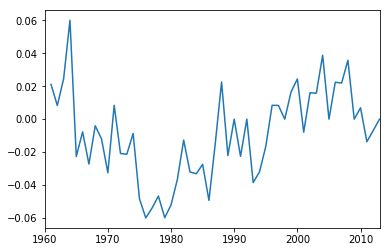

In [41]:
%matplotlib inline
italy_fr_pct_change.plot()
plt.show()

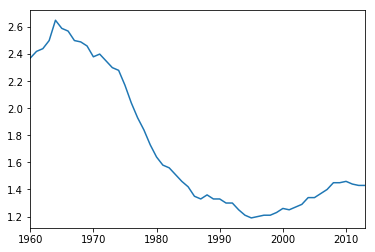

In [42]:
italy_years.plot()
plt.show()

In [43]:
thailand_years = fertility_rate_df.loc['Thailand', '1960':]

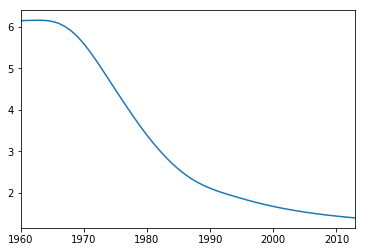

In [46]:
thailand_years.plot()
plt.show()

In [52]:
thailand_years.pct_change() * 100

1960         NaN
1961    0.065072
1962    0.065030
1963    0.032494
1964   -0.097450
1965   -0.357665
1966   -0.734214
1967   -1.232742
1968   -1.764021
1969   -2.354735
1970   -2.931992
1971   -3.538874
1972   -4.002223
1973   -4.400695
1974   -4.684030
1975   -4.935395
1976   -5.147059
1977   -5.332394
1978   -5.508685
1979   -5.619748
1980   -5.620479
1981   -5.601415
1982   -5.559026
1983   -5.456349
1984   -5.316544
1985   -5.024012
1986   -4.667445
1987   -4.283966
1988   -3.836317
1989   -3.413121
1990   -3.028912
1991   -2.744912
1992   -2.530414
1993   -2.346480
1994   -2.300613
1995   -2.302459
1996   -2.303160
1997   -2.192982
1998   -2.186099
1999   -2.063037
2000   -1.930954
2001   -1.909308
2002   -1.763990
2003   -1.671827
2004   -1.574307
2005   -1.535509
2006   -1.429500
2007   -1.384311
2008   -1.270053
2009   -1.218687
2010   -1.096642
2011   -1.108801
2012   -1.051156
2013   -0.920680
Name: Thailand, dtype: float64

In [48]:
us_years = fertility_rate_df.loc['United States', '1960':]

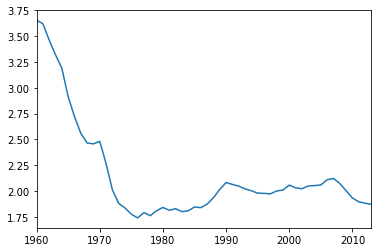

In [49]:
us_years.plot()
plt.show()